# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [4]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\ryanc\anaconda3\envs\pyvizenv2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [5]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")


## Load Data

In [6]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [7]:
# Calculate the mean number of housing units per year (hint: use groupby) 
mean_housing = sfo_data["housing_units"].groupby([sfo_data.index]).mean()
mean_housing

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'show'

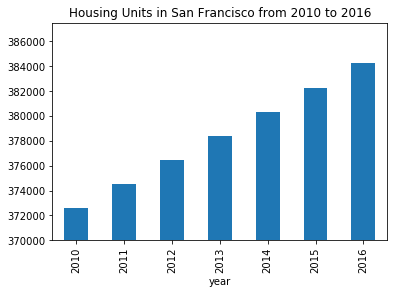

In [8]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
plt = mean_housing.plot(kind = "bar", ylim= (370000,387500), title = "Housing Units in San Francisco from 2010 to 2016")

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
mean_housing.min()
mean_housing.max()
mean_housing.std()


plt.show()
plt.close(fig_housing_units)

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [9]:
# Calculate the average gross rent and average sale price per square foot
avgs = sfo_data[["gross_rent", "sale_price_sqr_foot"]].groupby([sfo_data.index]).mean()
avgs

,gross_rent,sale_price_sqr_foot
year,,
2010,1239,369.344353
2011,1530,341.903429
2012,2324,399.389968
2013,2971,483.600304
2014,3528,556.277273
2015,3739,632.540352
2016,4390,697.643709


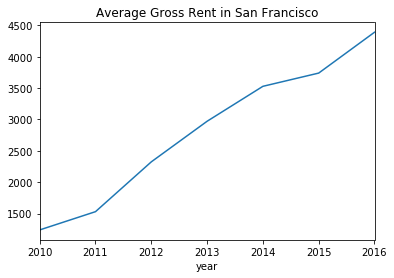

In [10]:
# Plot the Average Gross Rent per Year as a Line Chart 
avg_rent_plt = avgs["gross_rent"].plot(title = "Average Gross Rent in San Francisco")
avg_rent_plt

### Average Sales Price per Year

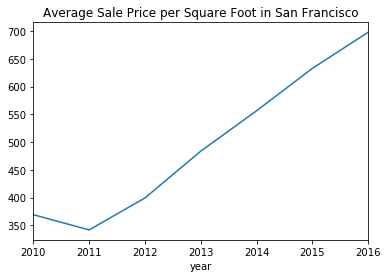

In [11]:
# Plot the Average Sales Price per Year as a line chart
avg_sale_price_sqr_foot = avgs["sale_price_sqr_foot"].plot(title = "Average Sale Price per Square Foot in San Francisco")
avg_sale_price_sqr_foot

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [12]:
avg_neighborhood_prices = sfo_data.groupby(["year", "neighborhood"]).mean().reset_index()
avg_neighborhood_prices.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


In [13]:
# Group by year and neighborhood and then create a new dataframe of the mean values
avg_neighborhood_prices = sfo_data.groupby(["year", "neighborhood"]).mean().reset_index()
avg_neighborhood_prices.head()
avg_df = pd.DataFrame()
avg_df = avg_neighborhood_prices[["year", "neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"]].set_index(["year", "neighborhood"])
avg_df.columns = ["Average Sale Price Per Square Foot", "Average Number of Housing Units Sold", "Average Gross Rent"]
avg_df.head()

Average Sale Price Per Square Foot  \
year neighborhood                                           
2010 Alamo Square                              291.182945   
     Anza Vista                                267.932583   
     Bayview                                   170.098665   
     Buena Vista Park                          347.394919   
     Central Richmond                          319.027623   

                       Average Number of Housing Units Sold  \
year neighborhood                                             
2010 Alamo Square                                    372560   
     Anza Vista                                      372560   
     Bayview                                         372560   
     Buena Vista Park                                372560   
     Central Richmond                                372560   

                       Average Gross Rent  
year neighborhood                          
2010 Alamo Square                    1239  
     Anza Vista                      1239  
     Bayview                         1239  
     Buena Vista Park                1239  
     Central Richmond                1239

In [16]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
avg_df.hvplot.line("year",
    "Average Sale Price Per Square Foot",
    xlabel="Year",
    ylabel="Avg. Sale Price per Square Foot",
    groupby="neighborhood",)

:DynamicMap   [neighborhood]
   :Curve   [year]   (Average Sale Price Per Square Foot)

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [13]:
# Getting the data from the top 10 expensive neighborhoods
avg_df.reset_index(inplace=True)
most_expensive = avg_df[["neighborhood", "Average Sale Price Per Square Foot"]].set_index("neighborhood").sort_values(by = "Average Sale Price Per Square Foot", ascending = False)
most_expensive.head(10)

,Average Sale Price Per Square Foot
neighborhood,
Union Square District,2258.702832
Presidio Heights,1465.968586
Merced Heights,1416.666667
Union Square District,1290.472107
Miraloma Park,1267.766203
Parnassus/Ashbury Heights,1207.997485
Outer Richmond,1196.645437
Marina,1132.837361
South of Market,1119.838877


In [14]:
# Plotting the data from the top 10 expensive neighborhoods
bar_chart = most_expensive.head(10).hvplot.bar(xlabel = "Neighborhood", ylabel = "Price", rot = 90, ylim = (500, 2400))
bar_chart

:Bars   [neighborhood]   (Average Sale Price Per Square Foot)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

In [29]:
new_avg = avg_df[["Average Sale Price Per Square Foot", "Average Number of Housing Units Sold", "Average Gross Rent"]].sort_values(by = "Average Sale Price Per Square Foot", ascending = False).head(10)
new_avg.reset_index(inplace = True)

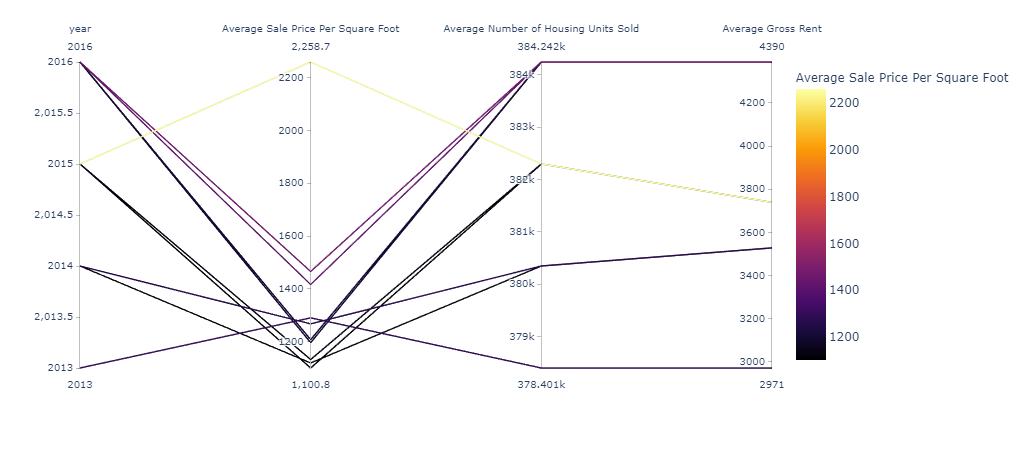

In [37]:
# Parallel Coordinates Plot
coordinates_chart = px.parallel_coordinates(new_avg, color = "Average Sale Price Per Square Foot", color_continuous_scale = px.colors.sequential.Inferno)
coordinates_chart

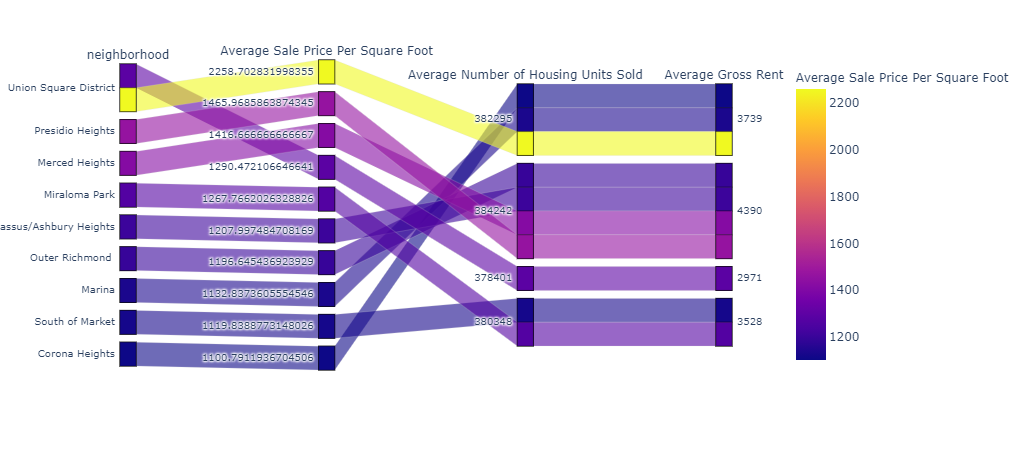

In [39]:
# Parallel Categories Plot
avg_df.reset_index(inplace= True)
categories = avg_df[["neighborhood", "Average Sale Price Per Square Foot", "Average Number of Housing Units Sold", "Average Gross Rent"]].sort_values(by = "Average Sale Price Per Square Foot", ascending = False).head(10)
categories_chart = px.parallel_categories(categories, dimensions = ["neighborhood", "Average Sale Price Per Square Foot", "Average Number of Housing Units Sold", "Average Gross Rent"], color = "Average Sale Price Per Square Foot")
categories_chart

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [181]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [197]:
# Calculate the mean values for each neighborhood
avg_gross_rent_by_neighborhood = sfo_data[["gross_rent", "sale_price_sqr_foot", "housing_units"]].groupby([sfo_data["neighborhood"]]).mean().reset_index()


In [201]:
# Join the average values with the neighborhood locations
join = pd.concat([df_neighborhood_locations, avg_gross_rent_by_neighborhood], axis = "columns", join = "inner")
join.drop(columns = "neighborhood").head()

,Neighborhood,Lat,Lon,gross_rent,sale_price_sqr_foot,housing_units
0,Alamo Square,37.791012,-122.402100,2817.285714,366.020712,378401.0
1,Anza Vista,37.779598,-122.443451,3031.833333,373.382198,379050.0
2,Bayview,37.734670,-122.401060,2318.400000,204.588623,376454.0
3,Bayview Heights,37.728740,-122.410980,3739.000000,590.792839,382295.0
4,Bernal Heights,37.728630,-122.443050,3080.333333,576.746488,379374.5


### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

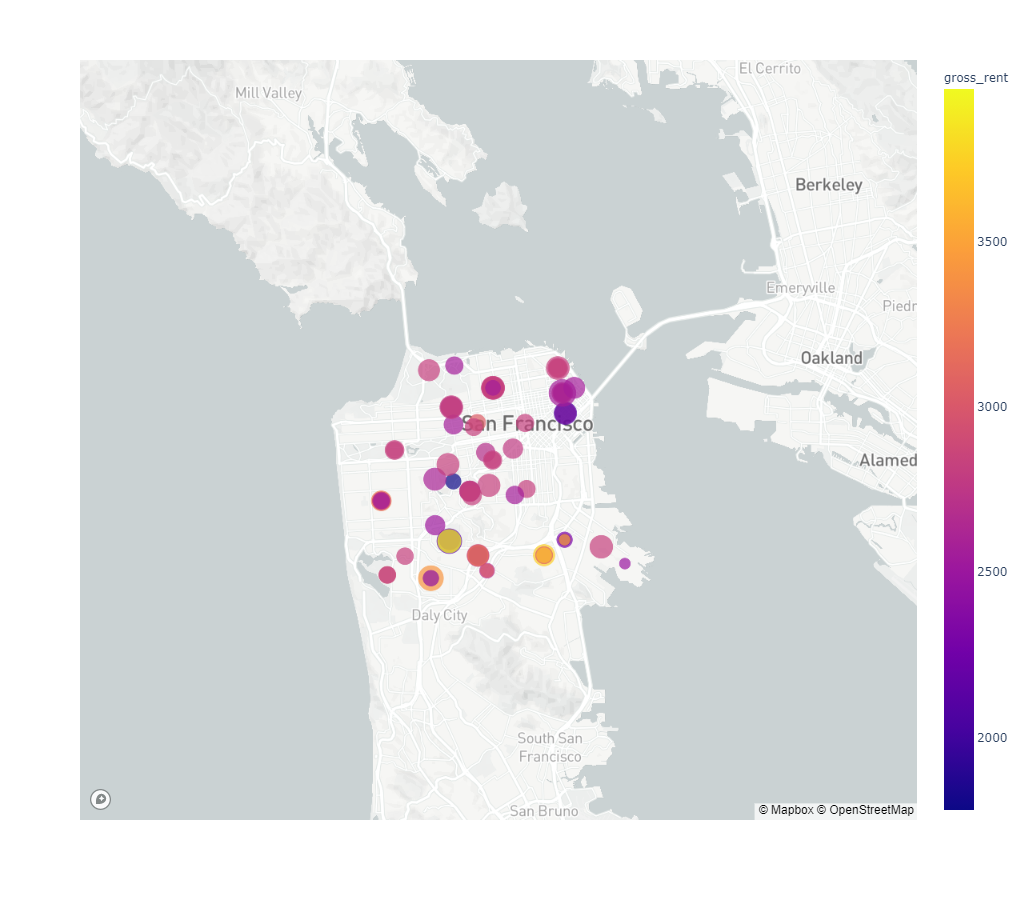

In [202]:
# Create a scatter mapbox to analyze neighborhood info
load_dotenv()
map_box_api = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(map_box_api)
map_plot = px.scatter_mapbox(
    join,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    zoom=4
)
map_plot.show()